# Pipelines

### Train and deploy machine learning models is a way that is maintainable and resistant to errors

* create steps
* apply steps to unseen data

In [1]:
import pandas as pd

boston = pd.read_csv('data/boston.csv')

In [2]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    476 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  target   506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
count,486.000000,506.000000,476.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.653050,11.363636,11.139538,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.719588,23.322453,6.881949,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


* CRIM could be highly positively skewed
    * mean = 3.6
    * median = 0.26
* ZN could be highly positively skewed
    * mean = 11.1
    * median = 0.000000

In [6]:
boston.isna().sum()

CRIM       20
ZN          0
INDUS      30
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
target      0
dtype: int64

In [7]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
CRIM,1.000000,-0.198043,0.423260,-0.053110,0.419520,-0.227405,0.349394,-0.376952,0.623160,0.582676,0.287318,0.458549,-0.389693
ZN,-0.198043,1.000000,-0.532421,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.423260,-0.532421,1.000000,0.055586,0.758235,-0.380082,0.646991,-0.704750,0.585536,0.715208,0.370152,0.593128,-0.466700
CHAS,-0.053110,-0.042697,0.055586,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.419520,-0.516604,0.758235,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.227405,0.311991,-0.380082,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.349394,-0.569537,0.646991,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.376952,0.664408,-0.704750,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.623160,-0.311948,0.585536,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582676,-0.314563,0.715208,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


In [8]:
(
    boston
    .corr()
    .target
    .sort_values(ascending=False)
)

target     1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.389693
NOX       -0.427321
INDUS     -0.466700
TAX       -0.468536
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

Text(0, 0.5, 'Mean')

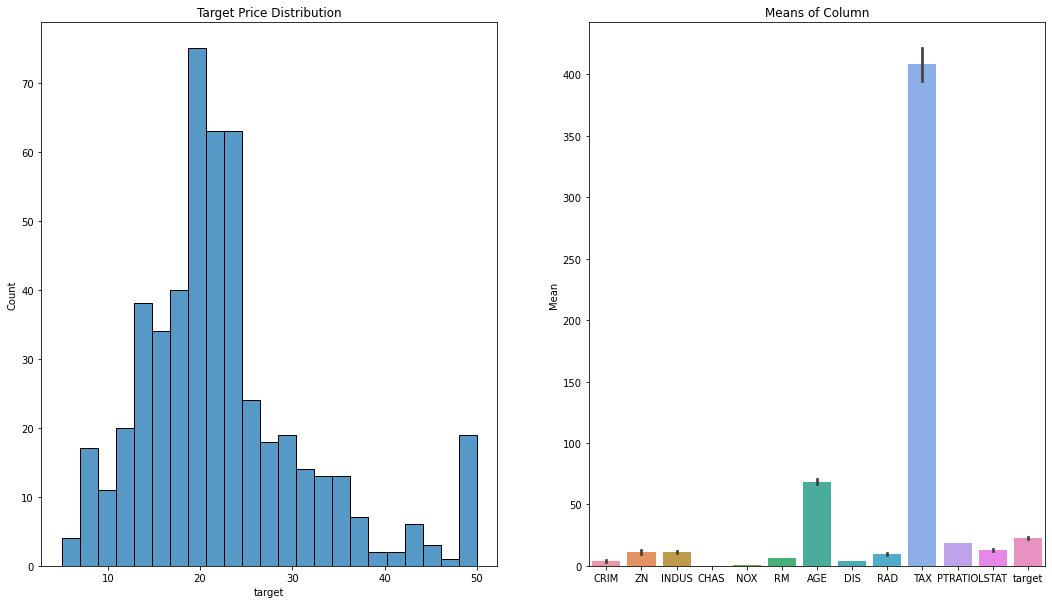

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize = (18, 10))
ax1 = sns.histplot(data=boston, x='target', ax=axes[0])
ax1.set_title('Target Price Distribution')
ax2 = sns.barplot(data=boston, estimator=np.mean, ax=axes[1])
ax2.set_title('Means of Column')
ax2.set_ylabel('Mean')

In [10]:
X = boston.drop(columns='target', axis=1)
y = boston.target

X.shape, y.shape

((506, 12), (506,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Use **medians** as a few of the variables are skewed

In [12]:
from sklearn.impute import SimpleImputer

# set up conditions for imputing
imp_median = SimpleImputer(missing_values=np.nan,
                          strategy='median')

X_train = imp_median.fit_transform(X_train)

In [13]:
type(X_train)

numpy.ndarray

In [14]:
X_train

array([[2.24890e-01, 1.25000e+01, 7.87000e+00, ..., 3.11000e+02,
        1.52000e+01, 2.04500e+01],
       [6.80117e+00, 0.00000e+00, 9.79500e+00, ..., 6.66000e+02,
        2.02000e+01, 1.47000e+01],
       [1.42502e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
        1.47000e+01, 7.39000e+00],
       ...,
       [1.50100e-02, 9.00000e+01, 1.21000e+00, ..., 1.98000e+02,
        1.36000e+01, 3.16000e+00],
       [3.61500e-02, 8.00000e+01, 4.95000e+00, ..., 2.45000e+02,
        1.92000e+01, 4.70000e+00],
       [2.31390e+00, 0.00000e+00, 1.95800e+01, ..., 4.03000e+02,
        1.47000e+01, 1.20300e+01]])

In [15]:
X_train = pd.DataFrame(X_train, columns=X.columns)

In [16]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.22489,12.5,7.870,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,20.45
1,6.80117,0.0,9.795,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,14.70
2,1.42502,0.0,19.580,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,7.39
3,1.23247,0.0,8.140,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72
4,0.10959,0.0,11.930,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [17]:
X_train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64

In [18]:
imp_median.statistics_

array([2.6363e-01, 0.0000e+00, 9.7950e+00, 0.0000e+00, 5.3800e-01,
       6.1930e+00, 7.7750e+01, 3.1009e+00, 5.0000e+00, 3.3450e+02,
       1.9000e+01, 1.1465e+01])

In [19]:
X_train.mean()

CRIM         3.833950
ZN          10.799435
INDUS       11.190791
CHAS         0.073446
NOX          0.556239
RM           6.268483
AGE         69.046045
DIS          3.767601
RAD          9.579096
TAX        410.853107
PTRATIO     18.470621
LSTAT       12.748870
dtype: float64

In [20]:
X_train.std()

CRIM         9.674732
ZN          22.802158
INDUS        6.671773
CHAS         0.261237
NOX          0.115147
RM           0.703271
AGE         27.984836
DIS          2.135298
RAD          8.729535
TAX        168.419367
PTRATIO      2.174989
LSTAT        7.214013
dtype: float64

The means and sd's are all on different scales

We want to get them on the same scale

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train) # this will subtract the mean and divide by sd for each stat

X_train = pd.DataFrame(X_train, columns=X.columns)

In [22]:
X_train.mean()

CRIM       2.556022e-17
ZN        -1.822146e-16
INDUS      6.209722e-17
CHAS       2.521523e-16
NOX       -4.916030e-16
RM         7.495574e-17
AGE       -5.124589e-16
DIS       -2.948050e-17
RAD       -2.069907e-17
TAX        1.581441e-16
PTRATIO    5.312762e-16
LSTAT     -2.388626e-16
dtype: float64

In [23]:
X_train.std()

CRIM       1.001415
ZN         1.001415
INDUS      1.001415
CHAS       1.001415
NOX        1.001415
RM         1.001415
AGE        1.001415
DIS        1.001415
RAD        1.001415
TAX        1.001415
PTRATIO    1.001415
LSTAT      1.001415
dtype: float64

* Means are now ~ 0
* Sd's are now ~ 1

In [24]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [25]:
# reset data without imputation steps above

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
pipe.fit_transform(X_train)

array([[ 1.64379587, -0.48895977,  1.07077491, ...,  1.58316953,
         0.83983626,  3.5868408 ],
       [ 0.30486516, -0.48895977,  1.07077491, ...,  1.58316953,
         0.83983626,  0.74239895],
       [-0.32495742, -0.48895977,  1.6354136 , ...,  0.20968415,
         1.2929715 ,  0.83683781],
       ...,
       [-0.38139478, -0.48895977, -1.30100555, ..., -1.0798327 ,
         0.16013339, -1.03079621],
       [ 1.19859793, -0.48895977,  1.07077491, ...,  1.58316953,
         0.83983626,  1.02289644],
       [-0.13241224, -0.48895977,  1.29126706, ...,  0.00576055,
        -1.6524076 , -0.20058003]])

In [27]:
pipe.transform(X_test)

array([[-0.37966767, -0.48895977,  0.44356412, ..., -0.75595405,
        -0.88207768,  0.13911793],
       [ 1.14103877, -0.48895977,  1.07077491, ...,  1.58316953,
         0.83983626,  0.37310076],
       [-0.21809632, -0.48895977,  1.29126706, ...,  0.00576055,
        -1.6524076 , -1.29719834],
       ...,
       [-0.29799377, -0.48895977, -0.1508708 , ..., -0.58801697,
         0.02419281, -0.922262  ],
       [-0.37600951, -0.48895977,  0.28564407, ..., -0.02422821,
         0.16013339, -0.8094992 ],
       [ 0.88493399, -0.48895977,  1.07077491, ...,  1.58316953,
         0.83983626,  1.85452215]])

In [28]:
# find the median values that are found on the training data which will be imputed on the test data (if needed)

pipe.named_steps.imputer.statistics_

array([2.5168e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.3200e-01,
       6.1715e+00, 7.7150e+01, 3.3246e+00, 5.0000e+00, 3.3000e+02,
       1.8850e+01, 1.1160e+01])

In [29]:
from sklearn.dummy import DummyRegressor

pipe_dummy = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', DummyRegressor(strategy='mean'))
])

pipe_dummy.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('regressor', DummyRegressor())])

In [30]:
from sklearn.metrics import mean_absolute_error

y_train_predict = pipe_dummy.predict(X_train)
y_test_predict = pipe_dummy.predict(X_test)

print('MAE train', mean_absolute_error(y_train, y_train_predict))
print('MAE test', mean_absolute_error(y_test, y_test_predict))

MAE train 6.552518433400364
MAE test 6.9454281891168606


<AxesSubplot:xlabel='target'>

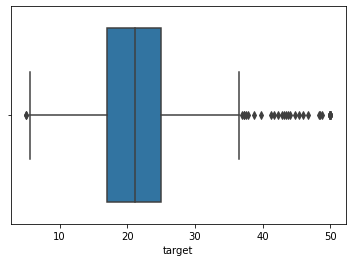

In [31]:
sns.boxplot(data=boston,
           x='target')

### Make linear regression model using pipeline

In [32]:
from sklearn.linear_model import LinearRegression

pipe_linreg = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipe_linreg.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [33]:
y_train_predict = pipe_linreg.predict(X_train)
y_test_predict = pipe_linreg.predict(X_test)

print('MAE train', mean_absolute_error(y_train, y_train_predict))
print('MAE test', mean_absolute_error(y_test, y_test_predict))

MAE train 3.2901403164385976
MAE test 3.881908902932435


## Results

* we have halved our **Mean Absolute Errors**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

pipe_linreg_poly = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipe_linreg_poly.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [35]:
y_train_predict = pipe_linreg_poly.predict(X_train)
y_test_predict = pipe_linreg_poly.predict(X_test)

print('MAE train', mean_absolute_error(y_train, y_train_predict))
print('MAE test', mean_absolute_error(y_test, y_test_predict))

MAE train 2.2045051785302076e-10
MAE test 364.643289308444


## Results

* MAE train is ~ 0
* MAE test is nearly 500!!!

Model is incredibly over-fit at this stage

What to do??? 

**Penalise large models**

In [36]:
from sklearn.linear_model import LassoLarsCV

pipe_lasso_poly = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "median")),
    ("poly", PolynomialFeatures(degree = 3, include_bias = False)),
    ("scaler", StandardScaler()),
    ("regressor", LassoLarsCV(max_iter = 100))
])

pipe_lasso_poly.fit(X_train, y_train)

/Users/lloydlombardi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/Users/lloydlombardi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:682: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 3

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('regressor', LassoLarsCV(max_iter=100))])

In [37]:
y_train_predict = pipe_lasso_poly.predict(X_train)
y_test_predict = pipe_lasso_poly.predict(X_test)

print('MAE train', mean_absolute_error(y_train, y_train_predict))
print('MAE test', mean_absolute_error(y_test, y_test_predict))

MAE train 2.0065879869519336
MAE test 2.5383845360924027


In [38]:
pipe_lasso_poly.named_steps.regressor.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -1.24558284,  5.77627167,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.11421437,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.15507369,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [39]:
sum(pipe_lasso_poly.named_steps.regressor.coef_ != 0)

46

In [40]:
len(pipe_lasso_poly.named_steps.regressor.active_)

46

In [41]:
poly_feature_names = (
    pipe_lasso_poly
    .named_steps.poly
    .get_feature_names_out(X_train.columns)
)
[poly_feature_names[i] for i in pipe_lasso_poly.named_steps.regressor.active_]

['RM^3',
 'RM^2 LSTAT',
 'CRIM CHAS RAD',
 'NOX^2 DIS',
 'CHAS DIS^2',
 'RM PTRATIO^2',
 'ZN RM^2',
 'RM TAX LSTAT',
 'RAD',
 'NOX RM PTRATIO',
 'DIS LSTAT^2',
 'CHAS RM RAD',
 'CRIM CHAS LSTAT',
 'INDUS^2 RAD',
 'ZN INDUS^2',
 'CRIM CHAS PTRATIO',
 'LSTAT^3',
 'RM DIS TAX',
 'INDUS^2 TAX',
 'CHAS LSTAT^2',
 'RM^2 TAX',
 'CRIM NOX^2',
 'AGE^2 DIS',
 'CRIM ZN RAD',
 'ZN LSTAT',
 'DIS',
 'DIS^2 RAD',
 'CHAS NOX^2',
 'INDUS DIS PTRATIO',
 'RM^2 RAD',
 'AGE RAD LSTAT',
 'NOX RAD LSTAT',
 'CRIM ZN CHAS',
 'CRIM CHAS AGE',
 'ZN^2 AGE',
 'INDUS RM LSTAT',
 'DIS^3',
 'ZN CHAS LSTAT',
 'INDUS^2 AGE',
 'RM AGE PTRATIO',
 'CRIM^3',
 'RAD^2 LSTAT',
 'ZN RAD^2',
 'NOX^3',
 'INDUS TAX',
 'AGE DIS^2']

In [43]:
import pickle

pickle.dump(pipe_lasso_poly, open('finalised_model.pkl', mode='wb'))

In [44]:
loaded_model = pickle.load(open("finalised_model.pkl", mode = "rb"))

In [45]:
input_data = X_test.sample(n = 1, axis = 0)

In [46]:
loaded_model.predict(input_data)

array([33.99685234])

In [47]:
input_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,4.59
